In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [194]:
data = pd.read_csv(r"C:\Users\srava\OneDrive\cars_data.csv")

# Importing the csv file into the jupiter notebook by using pd.read_csv.

In [8]:
data2=data.copy()
# Creating a copy of the original dataset 

In [9]:
data3=data2.copy()

In [10]:
data2

,kilometers_driven,price,fuel_type,gear_type,Model,Brand,CarType
0,60962,842000,Petrol,Manual,2021,Maruti,Vitara
1,12586,358000,Petrol,Manual,2012,Maruti,Swift
2,10151,422000,Petrol,Manual,2020,Renault,Kwid
3,73034,425000,CNG,Manual,2015,Hyundai,Grand
4,79896,219000,Petrol,Manual,2012,Honda,Brio
...,...,...,...,...,...,...,...
455,91369,618000,CNG,Manual,2018,Tata,NEXON
456,51522,669000,CNG,Manual,2022,Maruti,New
457,96699,472000,Petrol,Manual,2016,Hyundai,Elite
458,71373,541000,Petrol,Manual,2018,Toyota,Etios


In [16]:
data2['Model']
data2.info()

# Information about the columns in the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   kilometers_driven  460 non-null    int64 
 1   price              460 non-null    int64 
 2   fuel_type          460 non-null    object
 3   gear_type          460 non-null    object
 4   Model              460 non-null    int64 
 5   Brand              460 non-null    object
 6   CarType            460 non-null    object
dtypes: int64(3), object(4)
memory usage: 25.3+ KB


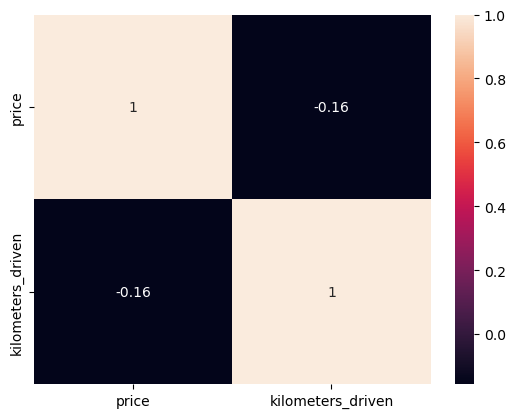

In [212]:
sns.heatmap(data2[['price','kilometers_driven']].corr(), annot=True)
plt.show()

### Insights:
### From the above relation between price and kilometers_driven we can conclude that they are weekly neagatively correlated. Price decreases when vehicle kilometers_driven increses.

In [219]:
data4=data2[['price','kilometers_driven']].corr(method='spearman')

# Correlarion between Price and kilometers_driven.

In [204]:
data4

,price,kilometers_driven
price,1.000000,-0.151058
kilometers_driven,-0.151058,1.000000


In [56]:
data2['Brand'].value_counts()

Maruti        172
Hyundai       112
Honda          57
Tata           32
Renault        16
Mahindra       14
KIA            11
Ford           10
Toyota          9
Volkswagen      7
Datsun          7
Jeep            7
Nissan          4
MG              1
Skoda           1
Name: Brand, dtype: int64

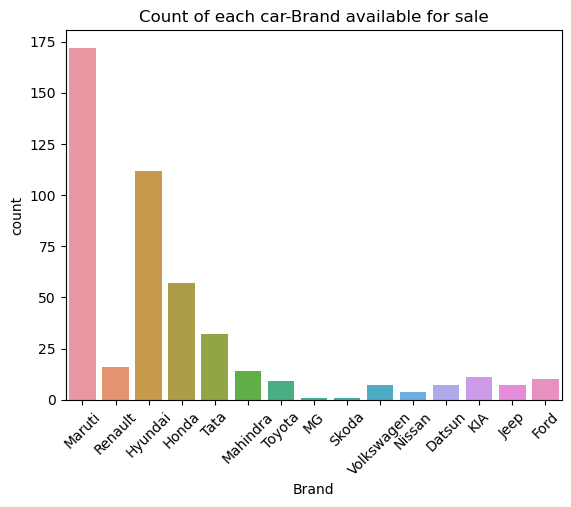

In [36]:
sns.countplot(x='Brand',data=data2)
plt.xticks(rotation=45)
plt.title('Count of each car-Brand available for sale')
plt.show()

In [ ]:
`Insights`

# From the above we can observwe that Maruthi cars are maximum in number for sale.
# MG and Scoda cars are minimum for sale.
# According to the collected data Maruthi and Hyundai cars are more in number for sale.


In [188]:
brands = data2.groupby(['Brand','fuel_type'])['price'].mean().round().reset_index()

In [191]:
brands

,Brand,fuel_type,price
0,Datsun,CNG,317000.0
1,Datsun,Petrol,352667.0
2,Ford,Diesel,725500.0
3,Ford,Petrol,645333.0
4,Honda,CNG,683333.0
5,Honda,Diesel,731000.0
6,Honda,Petrol,650714.0
7,Hyundai,CNG,464273.0
8,Hyundai,Diesel,661000.0
9,Hyundai,Petrol,505052.0


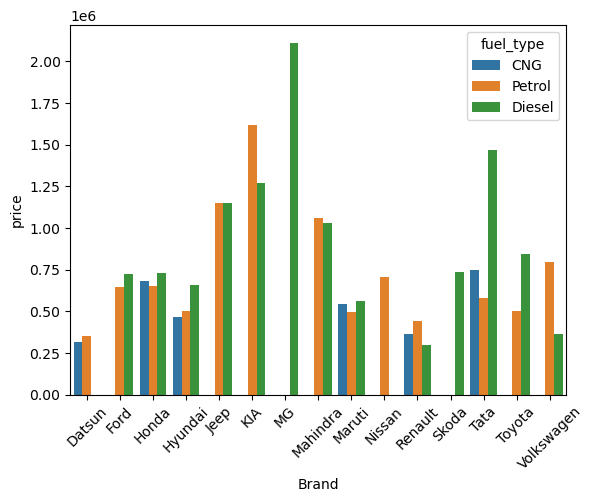

In [22]:
sns.barplot(x='Brand',y='price',hue='fuel_type',data=brands)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# There is only one car from MG with Diesel fuel type available for sale and it holds the highest price among all the cars
# In honda there are three fueltype cars in that Diesel cars are slightly higher than CNG and Petrol.
#mostly diseltype cars have huge prices compare to others

In [222]:
brands1 = data2.groupby(['Brand','gear_type'])

In [223]:
brands1

['max', 'min']

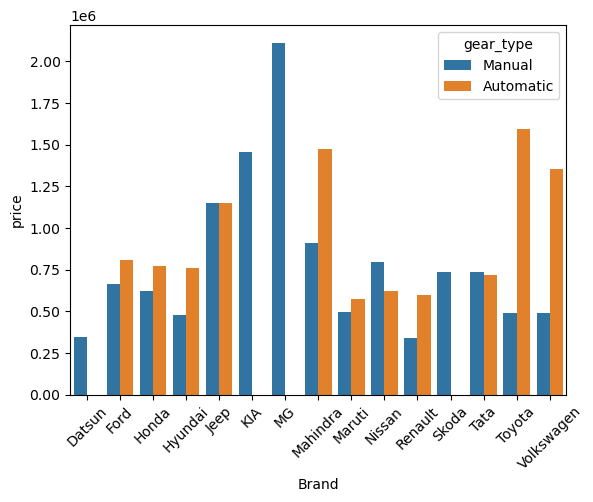

In [60]:
sns.barplot(x='Brand',y='price',hue='gear_type',data=brands)
plt.xticks(rotation=45)
plt.show()

In [55]:
#datsun kia skoda MG car brands has manual gear type among MG has hihest price 
#from the rest mostly automatic gear Type has highest price compared manual gear Type



In [53]:
data2['Model'].unique()

array([2021, 2012, 2020, 2015, 2016, 2018, 2019, 2022, 2011, 2014, 2017,
       2013, 2010, 2023], dtype=int64)

In [39]:
df=data2.groupby(['Model','Brand','CarType'])
data=df.agg({'kilometers_driven':['max','min'],'price':['max','min']})

In [40]:
data.head(60)

kilometers_driven          price        
                                       max    min     max     min
Model Brand      CarType                                         
2010  Maruti     Alto                60477  60477  177000  177000
                 Swift               77112  77112  359000  359000
2011  Honda      Brio                  115    115  187000  187000
                 City                  103    103  313000  313000
      Hyundai    i10                 15024  15024  224000  224000
      Maruti     Swift               99490  99490  287000  287000
                 Wagon               57488  25090  283000  250000
      Toyota     Corolla               102    102  306000  306000
                 Etios               88327  88327  261000  261000
2012  Honda      Brio                79896  44190  350000  219000
                 City                84920  38595  422000  314000
      Hyundai    i10                 51094  37288  283000  281000
                 i20                   114    114  328000  328000
      Maruti     Swift               96051    107  531000  330000
      Renault    Duster                121    121  370000  370000
      Toyota     Etios               53414  53414  316000  316000
                 Innova              79808  79808  502000  502000
      Volkswagen Polo                74075    115  404000  364000
2013  Hyundai    Eon                 91667  76855  245000  141000
                 Grand               92929  92929  353000  353000
                 Verna               50765  50765  451000  451000
                 i10                 68730  42971  335000  241000
                 i20                 51666  38425  402000  248000
      Maruti     Alto                70186   3870  257000  203000
                 Ertiga              99285  99285  619000  619000
                 Ritz                63491  63491  380000  380000
                 Swift               93357  65900  440000  340000
                 Wagon               87208    110  321000  253000
      Renault    Pulse               88433  88433  222000  222000
2014  Honda      Amaze               79352  79352  353000  353000
                 City                86961  62918  596000  511000
      Hyundai    Elite               81958  81958  469000  469000
                 Eon                 62947  62947  218000  218000
                 Xcent               80533  70232  428000  338000
                 i20                 90360  23750  478000  317000
      Mahindra   XUV500                124    124  793000  793000
      Maruti     Alto                66731  66731  270000  270000
                 Celerio             98083  78700  342000  305000
                 Swift               78352    107  535000  400000
                 Wagon               57238  57238  376000  376000
      Nissan     Micra               67950  67950  335000  335000
      Toyota     Etios               84318  84318  442000  442000
      Volkswagen Polo                42912  42912  409000  409000
2015  Honda      Amaze                 105    105  409000  409000
                 Brio                38437  38437  491000  491000
                 City                54388  41707  691000  610000
                 Jazz                91800  91800  496000  496000
      Hyundai    Creta                 113    113  655000  655000
                 Elite               75208  25723  513000  444000
                 Eon                 19090  19090  191000  191000
                 Grand               94090    101  463000  362000
                 i10                   107    107  372000  372000
      Maruti     Alto                70158  11633  306000  238000
                 Baleno              93509  48018  601000  428000
                 Celerio             40174  20656  413000  352000
                 Ciaz                70529  70529  521000  521000
                 Swift               74486  37430  597000  491000
                 Wagon               31355  31355  325000  325000

In [38]:
data.tail(20)

kilometers_driven           price         
                               max    min      max      min
Model Brand                                                
2020  Volkswagen             33615  33615   845000   845000
2021  Ford                   57662  57662   644000   644000
      Honda                  17805   8435   970000   814000
      Hyundai                11657   4058   772000   575000
      Mahindra               26325  26325  1284000  1284000
      Maruti                 60962   4960   863000   436000
      Nissan                 43431  24631   907000   866000
      Tata                   66965  10696  1955000   571000
2022  Honda                  46109   4675  1008000   898000
      Hyundai                51624  11001   986000   630000
      KIA                    25192   9041  1625000  1269000
      MG                     15882  15882  2112000  2112000
      Mahindra               21026  16237  1698000  1475000
      Maruti                 51522    866  1021000   513000
      Nissan                 25870  25870   728000   728000
      Renault                27330  27330   731000   731000
      Tata                   49551   1832  1969000   741000
      Volkswagen             16185  16185  1926000  1926000
2023  Hyundai                 2620   2620  1198000  1198000
      Maruti                  8041   3305   789000   579000

In [51]:
data2['CarType'].unique()

array(['Vitara', 'Swift', 'Kwid', 'Grand', 'Brio', 'Safari', 'BR', 'i10',
       'Baleno', 'XUV', 'Alto', 'Harrier', 'City', 'Etios', 'Eon',
       'Wagon', 'Dzire', 'Corolla', 'NEW', 'HECTOR', 'Rapid', 'Polo',
       'XUV500', 'Ritz', 'Xcent', 'Micra', 'Celerio', 'Amaze', 'TIGOR',
       'Go', 'Creta', 'TRIBER', 'IGNIS', 'Elite', 'i20', 'SELTOS',
       'Tiago', 'Scorpio', 'Compass', 'CARENS', 'New', 'Ecosport',
       'Duster', 'S', 'Thar', 'ALTROZ', 'NEXON', 'MAGNITE', 'FREESTYLE',
       'GRAND', 'KUV', 'Innova', 'Glanza', 'Jazz', 'Verna', 'Ertiga',
       'XUV700', 'WR', 'Ciaz', 'AURA', 'SONET', 'VIRTUS', 'VENUE',
       'TIAGO', 'Redi', 'TUV300', 'Pulse', 'CRV'], dtype=object)

In [58]:
data2['CarType'].value_counts()

Swift     45
Alto      29
City      26
Elite     24
Grand     21
          ..
XUV700     1
BR         1
HECTOR     1
Glanza     1
CRV        1
Name: CarType, Length: 68, dtype: int64

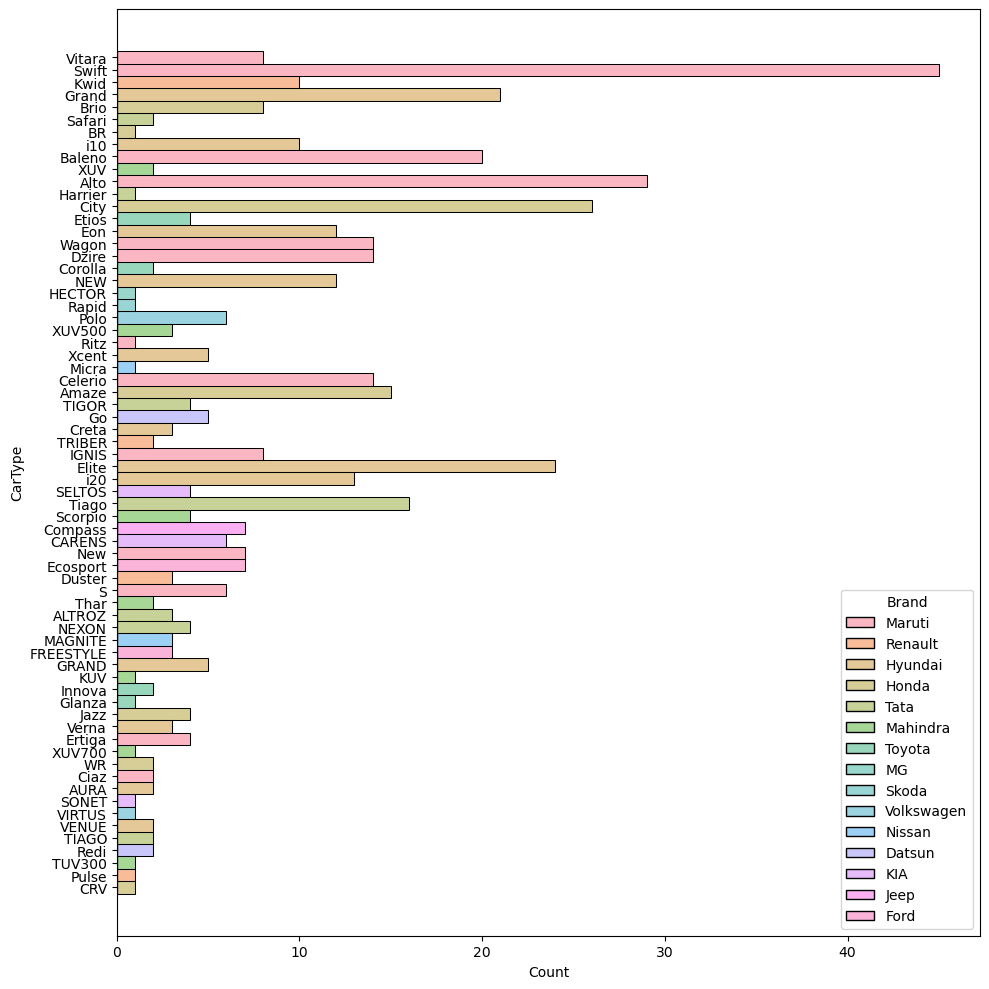

In [65]:
plt.figure(figsize=(10,10))
sns.histplot(data=data2,y='CarType',hue='Brand',stat='count')
plt.tight_layout()

In [191]:
x = data2['Model'].value_counts(normalize=True)

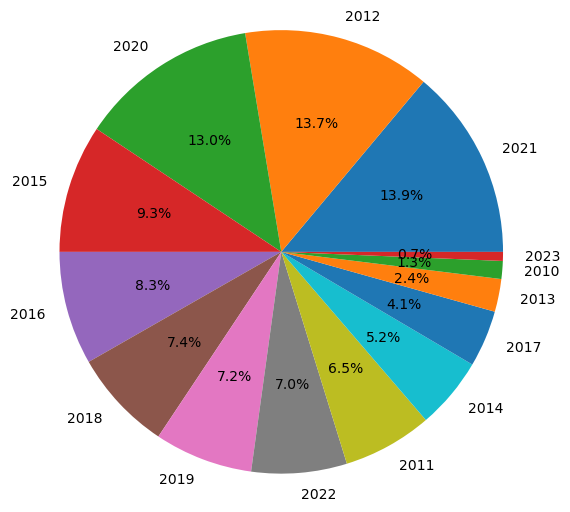

In [190]:
plt.pie(x,radius=1.5,autopct='%0.1f%%',labels=data2['Model'].unique())
plt.show()

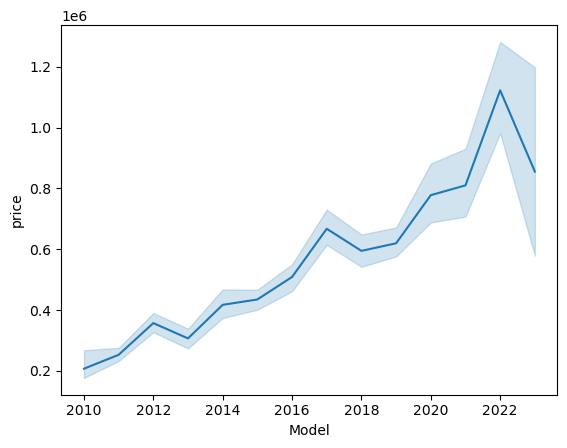

In [246]:
sns.lineplot(x='Model',y='price',data=data2)
plt.show()

In [263]:
len(data2['CarType'].unique())

68

In [285]:
df=data2.groupby(['Brand','CarType'])
data=df.agg({'kilometers_driven':['max','min'],'price':['max','min']})

In [286]:
data

kilometers_driven           price         
                                   max    min      max      min
Brand      CarType                                             
Datsun     Go                    68726  18689   490000   319000
           Redi                  58588  41811   317000   224000
Ford       Ecosport              77744    131   850000   580000
           FREESTYLE             57662  14765   701000   544000
Honda      Amaze                 99625    105  1008000   353000
...                                ...    ...      ...      ...
Toyota     Etios                 88327  53414   541000   261000
           Glanza                20612  20612   682000   682000
           Innova                79808  52639  1597000   502000
Volkswagen Polo                  77471    115   845000   364000
           VIRTUS                16185  16185  1926000  1926000

[68 rows x 4 columns]

In [72]:
data2['price'].max()

2112000

In [95]:
df=data2[data2['price']>=1200000].iloc[:10]

In [96]:
df

,kilometers_driven,price,fuel_type,gear_type,Model,Brand,CarType
5,66965,1955000,Diesel,Automatic,2021,Tata,Safari
13,35130,1969000,Diesel,Manual,2022,Tata,Harrier
26,15882,2112000,Diesel,Manual,2022,MG,HECTOR
61,64602,1269000,Diesel,Manual,2020,KIA,SELTOS
77,9041,1625000,Petrol,Manual,2022,KIA,CARENS
81,64602,1269000,Diesel,Manual,2020,KIA,SELTOS
97,9041,1625000,Petrol,Manual,2022,KIA,CARENS
115,22619,1353000,Petrol,Automatic,2020,Hyundai,Creta
126,26325,1284000,Petrol,Automatic,2021,Mahindra,Thar
233,21026,1698000,Diesel,Automatic,2022,Mahindra,Thar


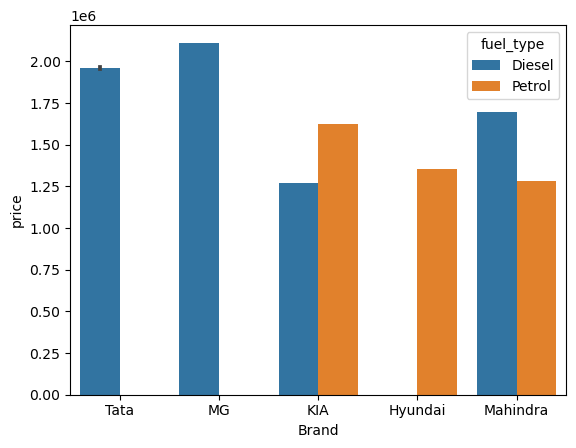

In [108]:
sns.barplot(x='Brand',y='price',hue='fuel_type',data=df)
plt.show()

In [143]:
data2['fuel_type'].value_counts()

Petrol    362
Diesel     63
CNG        35
Name: fuel_type, dtype: int64

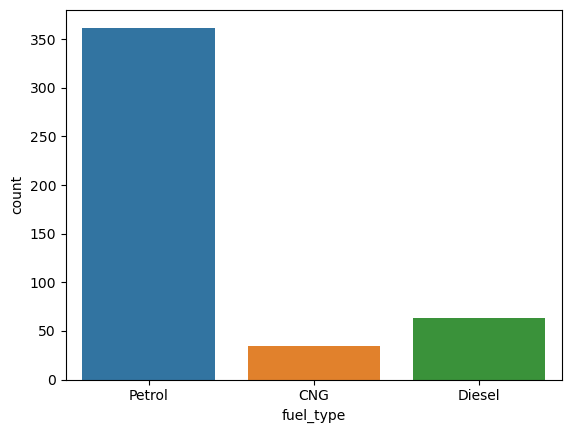

In [144]:
sns.countplot(x='fuel_type',data=data2)
plt.show()

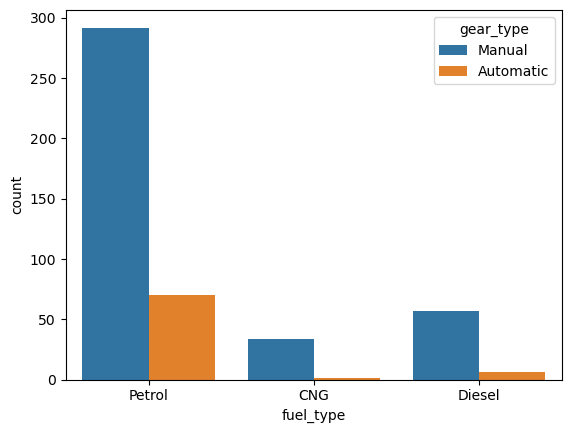

In [140]:
sns.countplot(x='fuel_type',data=data2,hue='gear_type')
plt.show()

In [151]:
data2['kilometers_driven'].max()

99625

In [152]:
data2['kilometers_driven'].min()

100

In [154]:
np.linspace(100,99625,10)

array([  100.        , 11158.33333333, 22216.66666667, 33275.        ,
       44333.33333333, 55391.66666667, 66450.        , 77508.33333333,
       88566.66666667, 99625.        ])

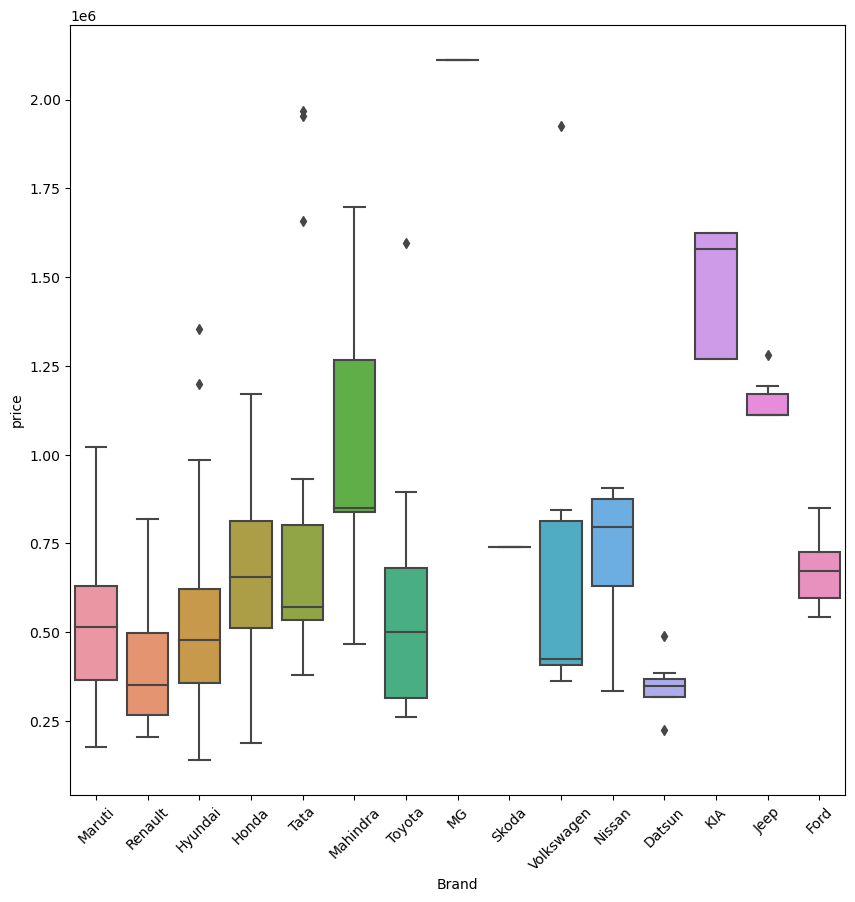

In [209]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data2['price'],x=data2['Brand'])
plt.xticks(rotation=45)
plt.show()

In [165]:
data2['price'].min()

141000

In [166]:
data2.loc[data2['price']==141000]

,kilometers_driven,price,fuel_type,gear_type,Model,Brand,CarType
79,76855,141000,Petrol,Manual,2013,Hyundai,Eon
99,76855,141000,Petrol,Manual,2013,Hyundai,Eon
259,76855,141000,Petrol,Manual,2013,Hyundai,Eon
279,76855,141000,Petrol,Manual,2013,Hyundai,Eon


In [170]:
df=data2.groupby('Brand')['kilometers_driven','price'].max().reset_index()

C:\Users\srava\AppData\Local\Temp\ipykernel_30180\1043213098.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df=data2.groupby('Brand')['kilometers_driven','price'].max().reset_index()


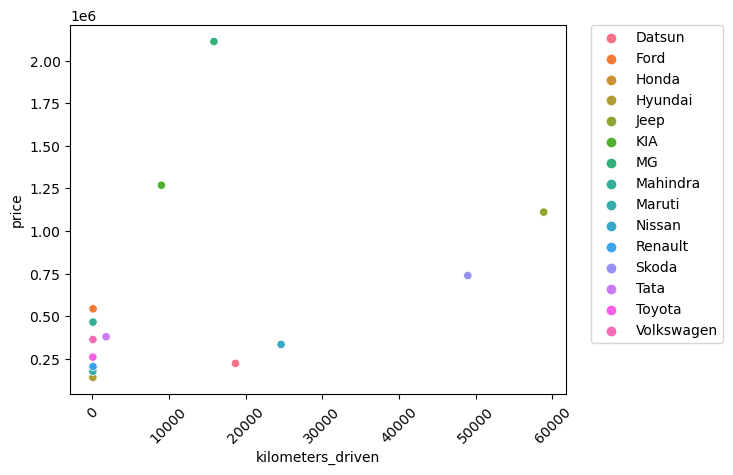

In [227]:
sns.scatterplot(x='kilometers_driven',y='price',hue='Brand',data=df)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [181]:
df1=data2.groupby('Brand')['kilometers_driven','price'].min().reset_index()

C:\Users\srava\AppData\Local\Temp\ipykernel_30180\3407972380.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=data2.groupby('Brand')['kilometers_driven','price'].min().reset_index()


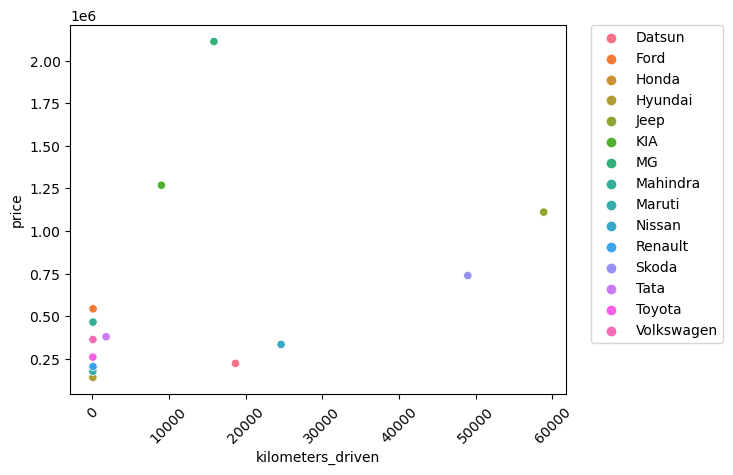

In [226]:
sns.scatterplot(x='kilometers_driven',y='price',hue='Brand',data=df1)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

<Axes: xlabel='kilometers_driven', ylabel='price'>

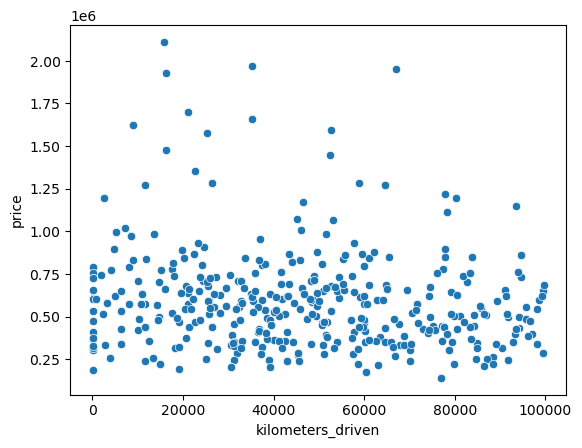

In [221]:
sns.scatterplot(x='kilometers_driven',y='price',data=data2)

In [220]:
data4

,price,kilometers_driven
price,1.000000,-0.151058
kilometers_driven,-0.151058,1.000000


<Axes: xlabel='price', ylabel='Density'>

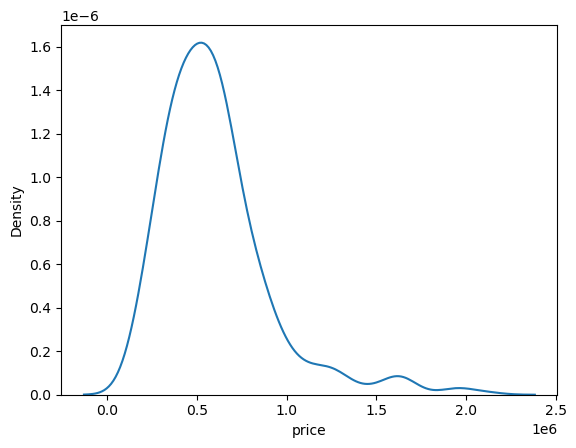

In [234]:
sns.kdeplot(x='price',data=data2)